# DM_05_04

## Import Libraries

In [1]:
%matplotlib inline
import pylab
import numpy as np
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

pylab.rcParams.update({'font.size': 14})

## Read CSV

In [2]:
df = pd.read_csv("AnomalyData.csv")
df.head()

,State,state_code,data science,cluster analysis,college,startup,entrepreneur,ceo,mortgage,nba,...,obfuscation,unicorn,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,PsychRegions,region,division
0,Alabama,AL,-1.00,-0.13,1.10,-0.68,0.15,-0.73,1.53,-0.74,...,-0.32,-1.03,55.5,52.7,55.5,48.7,42.7,1,3,6
1,Arizona,AZ,-0.42,-0.73,-0.10,0.11,0.57,0.25,0.95,0.38,...,0.38,0.10,50.6,46.6,58.4,38.1,54.7,2,4,8
2,Arkansas,AR,-0.66,-0.39,-0.64,-0.08,0.01,-0.66,-0.50,-0.71,...,-0.45,-0.32,49.9,52.7,41.0,56.2,40.3,1,3,7
3,California,CA,1.95,-0.62,-0.26,2.02,0.46,1.27,-0.97,1.46,...,0.70,-0.38,51.4,49.0,43.2,39.1,65.0,2,4,9
4,Colorado,CO,0.34,0.00,-0.61,1.49,0.05,0.33,1.38,-0.80,...,1.32,0.20,45.3,47.5,58.8,34.3,57.9,1,4,8


Save state_code to label outliers. "data" contains just quantitative variables.

In [3]:
state_code = df["state_code"]
data = df.loc[:, "data science": "Openness"]

## Univariate Outliers 
Create a box plot to display univariate outliers on "modern dance."

In [37]:
#param = "modern dance"
param = "royal family"

Get quantile values and IQR for outlier limits.

In [38]:
qv1 = data[param].quantile(0.25)
qv2 = data[param].quantile(0.5)
qv3 = data[param].quantile(0.75)
qv_limit = 1.5 * (qv3 - qv1)
print(qv1,qv2,qv3,qv_limit)

-0.645 -0.255 0.44000000000000006 1.6275


Get positions of outliers and use state_code for labels.

In [39]:
un_outliers_mask = (data[param] > qv3 + qv_limit) | (data[param] < qv1 - qv_limit)
print(data[param])
print(un_outliers_mask) # 决定outlier大于那个数或者小于哪个数，如果是outlier，标记true
un_outliers_data = data[param][un_outliers_mask]
print(un_outliers_data) #应该是modern dance，true/false
un_outliers_name = state_code[un_outliers_mask]
#print(un_outliers_name)

0     0.26
1    -1.06
2    -0.09
3    -1.04
4    -0.80
5     1.11
6     0.94
7    -0.84
8    -1.26
9    -0.83
10   -0.64
11    0.23
12    0.30
13   -0.58
14   -0.38
15   -0.42
16    1.53
17    1.38
18    1.56
19   -0.45
20    0.56
21   -0.46
22   -0.63
23   -0.12
24    0.40
25   -1.39
26    1.35
27    0.85
28   -0.06
29    0.76
30   -0.35
31   -0.66
32   -0.22
33   -0.58
34   -2.55
35    0.28
36    0.76
37   -0.04
38   -1.30
39    0.06
40   -1.31
41   -1.08
42    1.75
43   -0.29
44    0.32
45    0.56
46   -0.64
47   -0.35
Name: royal family, dtype: float64
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34     True
35    False
36   

Create box plot for "modern dance."

Text(0, 0.5, 'royal family')

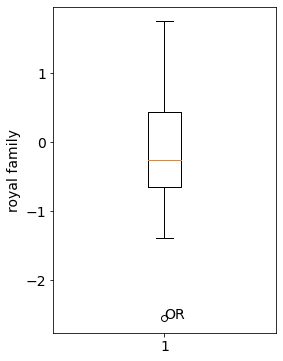

In [40]:
fig = pylab.figure(figsize=(4,6)) #设定图的大小，长宽
ax = fig.add_subplot(1, 1, 1) #add_subplot(nrows, ncols, index, **kwargs)
for name, y in zip(un_outliers_name, un_outliers_data):
    ax.text(1, y, name)
ax.boxplot(data[param])
ax.set_ylabel(param)

#  Bivariate Outliers
Create a scatterplot with an ellipse as a boundary for outliers.

Use the Google search terms "data science" and "ceo" for this example.

In [45]:
params = ["data science", "ceo"]
params_data = np.array([df[params[0]], df[params[1]]]).T #把这两个variable放在一个nested array里
print(params_data)

[[-1.   -0.73]
 [-0.42  0.25]
 [-0.66 -0.66]
 [ 1.95  1.27]
 [ 0.34  0.33]
 [ 0.69  1.52]
 [ 0.45  0.91]
 [-0.73  0.36]
 [-0.27  0.42]
 [-0.67 -0.59]
 [ 0.87  1.21]
 [ 0.01 -0.02]
 [-0.26 -0.65]
 [-0.73 -0.66]
 [-0.65 -0.72]
 [-1.08 -1.13]
 [-0.79 -0.81]
 [ 2.    0.8 ]
 [ 2.73  2.41]
 [-0.18 -0.14]
 [ 0.16  0.63]
 [-1.27 -1.38]
 [-0.47 -0.28]
 [-0.91 -0.89]
 [-0.12 -0.39]
 [-0.64  0.25]
 [-0.16  0.42]
 [ 1.42  1.48]
 [-0.39 -1.12]
 [ 2.03  2.46]
 [ 0.25  0.2 ]
 [-1.26 -1.02]
 [-0.21  0.06]
 [-0.79 -0.49]
 [-0.06 -0.85]
 [ 0.35  0.68]
 [ 1.34  0.42]
 [-0.59 -0.53]
 [-0.64 -1.24]
 [-0.47 -0.09]
 [-0.18 -0.06]
 [ 0.36  0.09]
 [-0.04 -0.33]
 [ 0.85 -0.36]
 [ 2.09  0.4 ]
 [-0.82 -1.22]
 [-0.3  -0.38]
 [-1.17 -1.27]]


Compute the "elliptical envelope."
EllipticEnvelope的reference https://www.studyai.cn/modules/outlier_detection.html

In [47]:
ee = EllipticEnvelope()
ee.fit(params_data)
print(ee)

EllipticEnvelope()


Get the names and positions of outliers.

In [52]:
biv_outliers_mask = ee.predict(params_data) == -1 #分析之后看到的结果，是不是outlier
print(biv_outliers_mask)
biv_outliers_data = params_data[biv_outliers_mask] #outlier的成对信息
print(biv_outliers_data)
biv_outliers_name = state_code[biv_outliers_mask] #outlier的state_code
print(biv_outliers_name)

[False False False  True False False False False False False False False
 False False False False False  True  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True False False False]
[[ 1.95  1.27]
 [ 2.    0.8 ]
 [ 2.73  2.41]
 [ 0.85 -0.36]
 [ 2.09  0.4 ]]
3     CA
17    MD
18    MA
43    VA
44    WA
Name: state_code, dtype: object


Calculate the decision boundary for the scatterplot.

In [53]:
xx, yy = np.meshgrid(np.linspace(params_data[:, 0].min(), params_data[:, 0].max(), 100),
                     np.linspace(params_data[:, 1].min(), params_data[:, 1].max(), 100))
zz = ee.decision_function(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)

Draw the scatterplot with the elliptical envelope and label the outliers.

Text(0, 0.5, 'ceo')

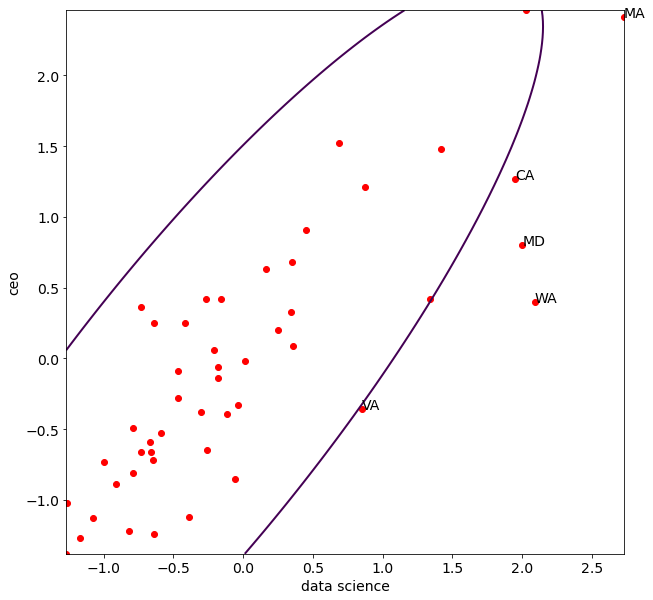

In [58]:
fig = pylab.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
for name, xy in zip(biv_outliers_name, biv_outliers_data):
    ax.text(xy[0], xy[1], name)
ax.contour(xx, yy, zz, levels=[0], linewidths=2) #椭圆形的线，但是这个是怎么决定的？
ax.scatter(params_data[:, 0], params_data[:, 1], color='red')
ax.set_xlabel(params[0])
ax.set_ylabel(params[1])

##  Multivariate Outliers
Use the one-class support vector machine (SVM) algorithm to classify unusual cases.
One Class SVM的reference：https://zhuanlan.zhihu.com/p/32784067

In [61]:
ocsvm = OneClassSVM(nu=0.25, gamma=0.05)
ocsvm.fit(data)

OneClassSVM(gamma=0.05, nu=0.25)

List the names of the outlying states based on the one-class SVM.

In [60]:
# 
state_code[ocsvm.predict(data) == -1]

7     FL
13    KS
14    KY
16    ME
17    MD
18    MA
19    MI
20    MN
21    MS
24    NE
25    NV
27    NJ
28    NM
30    NC
33    OK
39    TN
43    VA
Name: state_code, dtype: object